# Linear Regression Assignment

## Case Study - Shared Bikes Demand

### By - Ishkhan Marzook

__This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes__

## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Solution

### Step 1: Reading the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pandas libraries for data processing
import numpy as np
import pandas as pd

In [3]:
# Configuring pandas to display all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Loading the day.csv dataset
bike_demand = pd.read_csv("day.csv")

In [5]:
# Analyzing the shape of the data 
bike_demand.shape

(730, 16)

According to the above analysis, the given day.csv dataset contains __730 rows__ and __16 columns__ 

In [6]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step 2: Data Quality, Duplicate Check and Cleansing

In [7]:
# Printing the dataset column wise info for analysis
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking whether the dataset contains any duplicate records
bike_demand[bike_demand.duplicated(keep=False)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


According to the above analysis, we can conclude the following facts,
- The dataset doesn't contain any __null values__
- The dataset doesn't contain any __duplicate records__ 

We can observe that __instant column__ is the sequence number of the records, it doesn't add any significant importance for the analysis, hence we can remove the __instant column__

In [9]:
# Removing the instant column
bike_demand.drop(['instant'], axis = 1, inplace = True)

We have the __dteday column__, which is the date of the respective record, already the dataset contains the __year (yr)__ and __month (mnth)__ of the records, hence we can extract only the day of the month which is missing in the given dataset for further analysis (if required) and remove the __dteday column__

In [10]:
# Creating a new date column and storing the day of the respective record
bike_demand['day'] = pd.to_datetime(bike_demand['dteday'], format='%d-%m-%Y').dt.day

In [11]:
# Removing the dteday column
bike_demand.drop(['dteday'], axis = 1, inplace = True)

In [12]:
# Analyzing the shape of the data 
bike_demand.shape

(730, 15)

In [13]:
# Printing the dataset column wise info for verification
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
 14  day         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


In [14]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


We can remove the __casual__ and __registered__ columns since it's just a segregation of __cnt__, it won't help towards the analysis

In [15]:
# Removing the casual column
bike_demand.drop(['casual'], axis = 1, inplace = True)
# Removing the registered column
bike_demand.drop(['registered'], axis = 1, inplace = True)

In [16]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


### Step 3: Converting Feature Values Into Categorical Values

There're number of categorical variable candidates values are presented as numeric values in the given dataset, for the initial analysis purposes, having these categorical variable values in numerical representation won't help much to understand the dataset and its correlations, hence we need to convert feature values of categorical variables into string values, following categorical variable values needed to be converted into string values,
- season
- yr
- weathersit
- holiday
- workingday
- mnth
- weekday

In [17]:
# Creating the map function for season
def season_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [18]:
# Applying the season map for season column
bike_demand[['season']]=bike_demand[['season']].apply(season_map)

In [19]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [20]:
# Creating the map function for year
def year_map(x):
    return x.map({0: '2018', 1: '2019'})

In [21]:
# Applying the year map for yr column
bike_demand[['yr']]=bike_demand[['yr']].apply(year_map)

In [22]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,5


In [23]:
# Creating the map function for weather
def weather_map(x):
    return x.map({ 1: 'clear.', 2 : 'mist + cloudy.', 3 : 'light snow.', 4 : 'heavy rain'})

In [24]:
# Applying the weather map for weathersit column
bike_demand[['weathersit']]=bike_demand[['weathersit']].apply(weather_map)

In [25]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,1,0,6,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,1,0,0,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,1,0,1,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,1,0,2,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,1,0,3,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


In [26]:
# Creating the map for yes/no options
def option_map(x):
    return x.map({0: 'no', 1: 'yes'})

In [27]:
# Applying the options map for holiday column
bike_demand[['holiday']]=bike_demand[['holiday']].apply(option_map)

In [28]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,1,no,6,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,1,no,0,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,1,no,1,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,1,no,2,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,1,no,3,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


In [29]:
# Applying the options map for workingday column
bike_demand[['workingday']]=bike_demand[['workingday']].apply(option_map)

In [30]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,1,no,6,no,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,1,no,0,no,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,1,no,1,yes,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,1,no,2,yes,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,1,no,3,yes,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


In [31]:
# Creating the map function for month
def month_map(x):
    return x.map({1: 'jan.', 2: 'feb.', 3: 'mar.', 4:'apr.', 5: 'may', 6: 'jun.',
                  7: 'jul.', 8: 'aug.', 9: 'sep.', 10: 'oct.', 11: 'nov.', 12: 'dec.'})

In [32]:
# Applying the month map for mnth column
bike_demand[['mnth']]=bike_demand[['mnth']].apply(month_map)

In [33]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan.,no,6,no,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,jan.,no,0,no,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,jan.,no,1,yes,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,jan.,no,2,yes,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,jan.,no,3,yes,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


In [34]:
# Creating the map function for weekday
def weekday_map(x):
    return x.map({0: 'mon.', 1: 'tue.', 2: 'wed.', 3:'thu.', 4: 'fri.', 5: 'sat.', 6 : 'sun.'})

In [35]:
# Applying the weekday map for weekday column
bike_demand[['weekday']]=bike_demand[['weekday']].apply(weekday_map)

In [36]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan.,no,sun.,no,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,jan.,no,mon.,no,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,jan.,no,tue.,yes,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,jan.,no,wed.,yes,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,jan.,no,thu.,yes,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


In [37]:
# Printing the dataset column wise info for verification
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  day         730 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 74.3+ KB


### Step 4: Understanding the Data by Visualizing

After completion of data preparation, we should understand the dataset further for existence of any corrections and multicollinearity, to perform identification of correlations and multicollinearity, we use classic data visualizing techniques.

In [38]:
# Importing matplotlib and seaborn libraries for data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualizing Numeric Variables

To visualize numeric variables we can use scatter plots, due to we have multiple numeric variables, we can create a pairplot for visualizing all the numeric data points in a single figure.

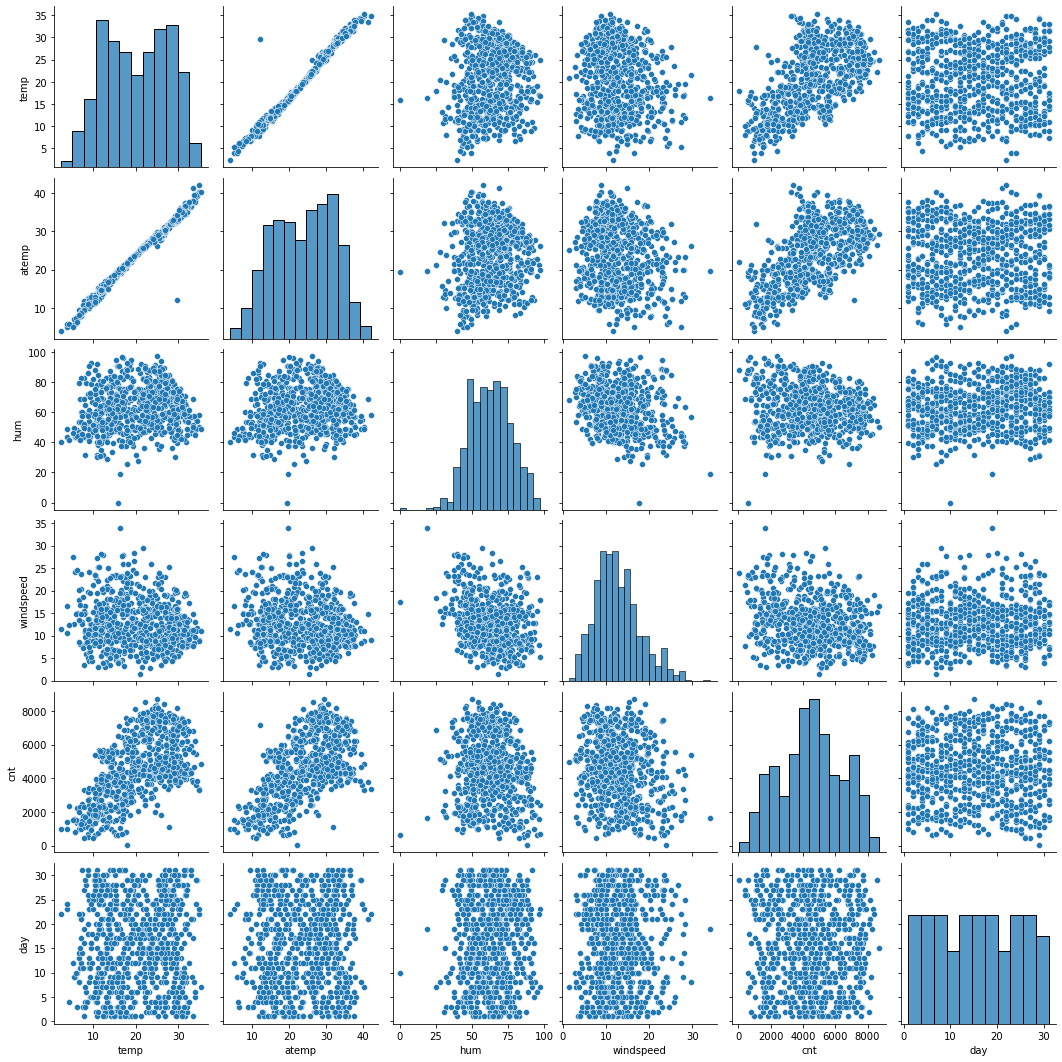

In [39]:
# Creating a scatter plot for the dataset 
sns.pairplot(bike_demand)
plt.show()

By analyzing the above scatter plot we can get some important insights of the numeric variables, few of them are listed below,
- There is a strong linear relationship between __temp, atemp__ aginst __cnt__
- There is a possible multicollinearity exists between __temp__ and __atemp__

#### Visualizing Catogorical Vriables

To visualize categorical variables box plot is the idle charting option, to analyze multiple categorical variables in one figure, we can create a subplot.

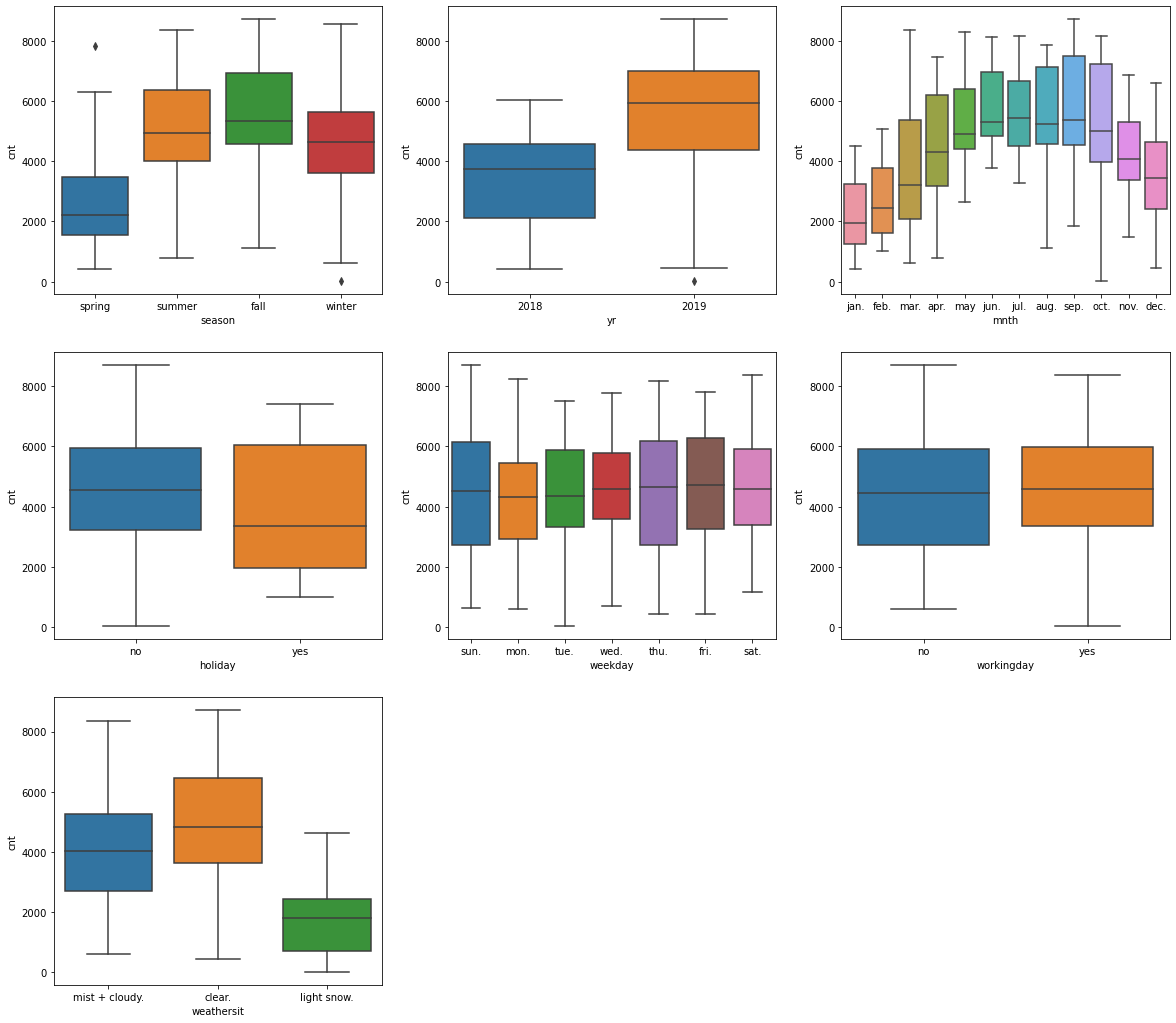

In [40]:
# Creating the subplot for the categorical variables
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_demand)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_demand)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_demand)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_demand)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_demand)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_demand)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_demand)
plt.show()

By analyzing the above scatter plot we can get some important insights of the categorical variables, few of them are listed below,
- The demand for the shared bikes are growing from year __2018 to 2019__
- On a __clear weather__ day there is a __high demand__ for shared bikes
- On a __non holiday__ day there is a __high demand__ for shared bikes
- The demand for shared bikes __grows until 3rd quarter of a year__, then there is a slight drop

### Step 5: Data Preparation

After understanding the data with the help of visualization, the next step will be the data preparation for build the model, in order to prepare data we will follow several standard procedures. During the model building process algorithms can only interpret numbers, we need to convert categorical values into numeric values.

#### 5.1 Converting 'Yes' or 'No' Type of Columns into 0 and 1

The __holiday__ and __working__ day columns contain either 'Yes' or 'No' values, hence these 2 columns are idle coulmns to convert into 0 and 1 values.

In [41]:
# Creating the map function
def binary_map(x):
    return x.map({'no': 0, 'yes': 1})

In [42]:
bike_demand[['holiday']]=bike_demand[['holiday']].apply(binary_map)
bike_demand[['workingday']]=bike_demand[['workingday']].apply(binary_map)

In [43]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,spring,2018,jan.,0,sun.,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1
1,spring,2018,jan.,0,mon.,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2
2,spring,2018,jan.,0,tue.,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3
3,spring,2018,jan.,0,wed.,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4
4,spring,2018,jan.,0,thu.,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5


#### 5.2 Creating Dummy Variables

Creating dummy variables is another popular technique to convert categorical values into numerical form, categorical variables having multiple values will be a good candidate for creating dummy variables, hence we will create dummy variables for following categorical variables,

- season
- yr
- mnth
- weekday 	
- weathersit

In [44]:
# Creating dummy variable for session column
season_dummy = pd.get_dummies(bike_demand['season'], drop_first = True)

In [45]:
# Concatenating the season dummy variable with the dataset
bike_demand = pd.concat([bike_demand, season_dummy], axis = 1)

In [46]:
# Removing the session column from the dataset
bike_demand.drop(['season'], axis = 1, inplace = True)

In [47]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter
0,2018,jan.,0,sun.,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0
1,2018,jan.,0,mon.,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0
2,2018,jan.,0,tue.,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0
3,2018,jan.,0,wed.,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0
4,2018,jan.,0,thu.,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0


In [48]:
# Creating dummy variable for yr column
yr_dummy = pd.get_dummies(bike_demand['yr'], drop_first = True)

In [49]:
# Concatenating the yr dummy variable with the dataset
bike_demand = pd.concat([bike_demand, yr_dummy], axis = 1)

In [50]:
# Removing the yr column from the dataset
bike_demand.drop(['yr'], axis = 1, inplace = True)

In [51]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019
0,jan.,0,sun.,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0
1,jan.,0,mon.,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0
2,jan.,0,tue.,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0
3,jan.,0,wed.,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0
4,jan.,0,thu.,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0


In [52]:
# Creating dummy variable for mnth column
mnth_dummy = pd.get_dummies(bike_demand['mnth'], drop_first = True)

In [53]:
# Concatenating the mnth dummy variable with the dataset
bike_demand = pd.concat([bike_demand, mnth_dummy], axis = 1)

In [54]:
# Removing the mnth column from the dataset
bike_demand.drop(['mnth'], axis = 1, inplace = True)

In [55]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.
0,0,sun.,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,mon.,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,tue.,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,wed.,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,thu.,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
# Creating dummy variable for weekday  column
weekday_dummy = pd.get_dummies(bike_demand['weekday'], drop_first = True)

In [57]:
# Concatenating the weekday dummy variable with the dataset
bike_demand = pd.concat([bike_demand, weekday_dummy], axis = 1)

In [58]:
# Removing the weekday column from the dataset
bike_demand.drop(['weekday'], axis = 1, inplace = True)

In [59]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.,mon.,sat.,sun.,thu.,tue.,wed.
0,0,0,mist + cloudy.,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,mist + cloudy.,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,clear.,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,clear.,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,clear.,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [60]:
# Creating dummy variable for weathersit  column
weathersit_dummy = pd.get_dummies(bike_demand['weathersit'], drop_first = True)

In [61]:
# Concatenating the weathersit dummy variable with the dataset
bike_demand = pd.concat([bike_demand, weathersit_dummy], axis = 1)

In [62]:
# Removing the weathersit column from the dataset
bike_demand.drop(['weathersit'], axis = 1, inplace = True)

In [63]:
# Printing the head of the dataset to analyze the values 
bike_demand.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.,mon.,sat.,sun.,thu.,tue.,wed.,light snow.,mist + cloudy.
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Step 6: Splitting the Data into Training, Testing Sets and Scaling 

After preparation of the data for model building, the important step is to split the dataset into train and test sets, with the training dataset we will train the model for understand the data and with the test data set we will test the model to evaluate how well model had understood the data with the training data set.

In [64]:
# Importing necessary libraries for split the dataset and rescaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [65]:
# Splitting the dataset into 70%, 30% ratio, which mean 70% training and 30% testing
np.random.seed(0)
bike_demand_train, bike_demand_test = train_test_split(bike_demand, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
# Verifying the shape of train dataset
bike_demand_train.shape

(510, 31)

In [67]:
# Verifying the shape of test dataset
bike_demand_test.shape

(219, 31)

After splitting the data into the train and test set, the important task to scale the data, due to different data point holds a different range of values, to interpret the model better, we need to make sure all necessary columns should scaled, hence following columns will get scaled,
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

To scale the data there are multiple techniques, we will use a technique called Min Max Scaling

In [68]:
# Building the min max scaler
scaler = MinMaxScaler()

In [69]:
# Creating a list of the column to scale
scale_columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']
# Applying scaling for the columns
bike_demand_train[scale_columns] = scaler.fit_transform(bike_demand_train[scale_columns])

In [70]:
# Printing the head of the dataset to analyze the values 
bike_demand_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.,mon.,sat.,sun.,thu.,tue.,wed.,light snow.,mist + cloudy.
653,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,16,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,31,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,30,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,28,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [71]:
# Analyzing the scaled dataset summary
bike_demand_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.,mon.,sat.,sun.,thu.,tue.,wed.,light snow.,mist + cloudy.
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,15.613725,0.243137,0.245098,0.24902,0.507843,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,8.899450,0.429398,0.430568,0.43287,0.500429,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,16.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,23.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Step 7: Building the Model

After splitting the data for training and testing sets, we're all set to build the model, there are many techniques to build a model and we're going to use a composition of multiple techniques to build the optimal model. The following steps will be followed during to model building process.
- Selecting the Optimal Features by Performing RFE
- Building the Model with RFE Supported Features
- Calculating the VIF for the Features
- Analyzing OLS Statistics and VIF Values to Eliminate Features Until Build the Optimal Model

#### 7.1 Dividing the Dataset Into X and Y Sets for The Model

In [72]:
# Deviding the data into test train set 
X_train = bike_demand_train
y_train = bike_demand_train.pop('cnt')

#### 7.2 Performing RFE to Identify the Suitable Coulmns fo the Model

In [73]:
# Importing RFE and LinearRegression libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
# Building the Linear Regression model and fitting the data into it
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Running RFE expecting count of 10 possible outputs 
rfe = RFE(model, step=10)             
rfe = rfe.fit(X_train, y_train)

In [76]:
# Analyzing the RFE results 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('day', False, 3),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('2019', True, 1),
 ('aug.', False, 3),
 ('dec.', True, 1),
 ('feb.', False, 2),
 ('jan.', True, 1),
 ('jul.', True, 1),
 ('jun.', False, 3),
 ('mar.', False, 3),
 ('may', False, 2),
 ('nov.', True, 1),
 ('oct.', False, 3),
 ('sep.', True, 1),
 ('mon.', False, 3),
 ('sat.', False, 3),
 ('sun.', True, 1),
 ('thu.', False, 3),
 ('tue.', False, 3),
 ('wed.', False, 3),
 ('light snow.', True, 1),
 ('mist + cloudy.', True, 1)]

In [77]:
# Extracting the RFE supportted columns 
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', '2019',
       'dec.', 'jan.', 'jul.', 'nov.', 'sep.', 'sun.', 'light snow.',
       'mist + cloudy.'],
      dtype='object')

In [78]:
# Filtering the train set with RFE supported columns
X_train_rfe = X_train[rfe_support_col]

#### 7.3 Creating the Model with RFE Supported Columns

In [79]:
import statsmodels.api as sm

In [80]:
# Creating function to build the model and print OLS statistics
def build_model():
    # Adding the rfe supported columns
    X_train_lm = sm.add_constant(X_train_rfe)
    # Fitting the model
    lr_model = sm.OLS(y_train, X_train_lm).fit()
    # printing the model summary
    return lr_model

In [81]:
print(build_model().summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.93e-188
Time:                        18:18:30   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3623      0.032     11.

#### 7.4 Analysing VIF

In [82]:
# Importing necessary libraries for check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# Creating a DataFame to fit the RFE supported columns
def calculate_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [84]:
# Calculating the VIF
calculate_vif()

          Features    VIF
2              hum  24.57
1             temp  16.88
3        windspeed   4.10
5           winter   2.98
4           spring   2.94
14  mist + cloudy.   2.26
6             2019   2.07
10            nov.   1.82
8             jan.   1.75
7             dec.   1.54
9             jul.   1.42
13     light snow.   1.24
11            sep.   1.22
12            sun.   1.19
0          holiday   1.06


According to the OLS Summary and VIF results we can conclude that __hum__ has a very high __VIF__, hence concluded to remove the __hum__ feature

#### 7.5 Rebuild Model After Removal of hum (humidity)

In [85]:
# Removing the hum feature 
X_train_rfe.drop(['hum'], axis = 1, inplace = True)

In [86]:
# Build the model and print OLS
print(build_model().summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.00e-186
Time:                        18:18:32   Log-Likelihood:                 504.94
No. Observations:                 510   AIC:                            -979.9
Df Residuals:                     495   BIC:                            -916.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2865      0.025     11.

In [87]:
# Calculate VIF
calculate_vif()

          Features   VIF
1             temp  4.70
2        windspeed  4.08
4           winter  2.54
3           spring  2.37
5             2019  2.07
9             nov.  1.80
7             jan.  1.65
13  mist + cloudy.  1.53
6             dec.  1.46
8             jul.  1.36
10            sep.  1.21
11            sun.  1.19
12     light snow.  1.09
0          holiday  1.06


After removing the __hum__ feature, we can observe that VIF value of all other features is __below 5__ and __P Value all the features are lesser than 0.1__ which is an indication of our current model is a good fit with very __strong Adj. R-squared of 0.835__

### Step 8: Residual Analysis of the Train Data

Residual analysis is one of the key tests can be performed to validate whether error terms are normally distributed, which a is core assumptions of linear regression algorithm.

In [88]:
# Building the model
model = build_model()
# Adding constant for the train dataset
X_train_lm = sm.add_constant(X_train_rfe)
#Predicting the price
y_train_price = model.predict(X_train_lm)

Text(0.5, 0, 'Errors')

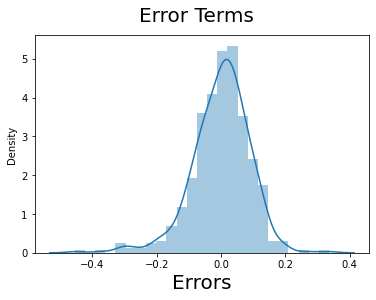

In [89]:
# Ploting the histogram for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 20) 

According to the above error term distribution, we can observe that it is a perfect normal distribution which confirms the model is a good candidate for linear regression

### Step 9: Making Predictions Using the Final Model

Now we can predict the values for the test set with the final model and plot a graph between actual vs. predicted values

In [90]:
# Scaling the test dataset
bike_demand_test[scale_columns] = scaler.transform(bike_demand_test[scale_columns])

In [91]:
# Analyzing the scaled dataset
bike_demand_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,spring,summer,winter,2019,aug.,dec.,feb.,jan.,jul.,jun.,mar.,may,nov.,oct.,sep.,mon.,sat.,sun.,thu.,tue.,wed.,light snow.,mist + cloudy.
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,16.018265,0.255708,0.264840,0.232877,0.479452,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.027397,0.319635
std,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,8.575067,0.437258,0.442259,0.423633,0.500722,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.163612,0.467403
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,8.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,24.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
# Creating X train y train for prediction
y_test = bike_demand_test.pop('cnt')
X_test = bike_demand_test

In [93]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test[X_train_rfe.columns])

In [94]:
model = build_model()
y_pred_final = model.predict(X_test_lm)

### Step 10: Model Evaluation


We will analyze the test y value vs. predicted y values for understanding how the better model has learned from the train dataset.

Text(0, 0.5, 'y_pred')

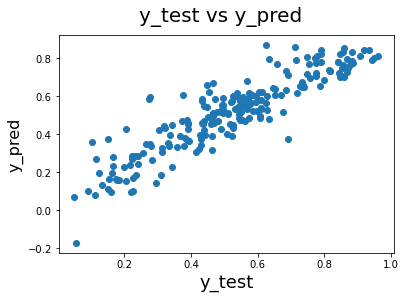

In [95]:
# Creating a scatter plot for y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_final)
# Plot heading
fig.suptitle('y_test vs y_pred', fontsize = 20)
# Adding labels
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)   

We can observe that above plot has a strong linear relationship and We can conclude that the equation of our best fitted line is:

 _**cnt** = **(0.4033 x temp)** + **(0.0646 x winter)** + **(0.2352 x (year 2019))** + **(0.0533 x sep.)** + **(0.0204 x sun.)** + **(-0.0880 x holiday)** + **(-0.1563 x windspeed)** + **(-0.1033 x spring)** + **(dec. x -0.0520)** + **(-0.0562 x jan)** + **(-0.0649 x jul.)** + **(-0.0484 x nov.)** + **(-0.2954 x light snow.)** + **(-0.0813 x (mist + cloudy.))**_

### Calculating the R-squared Score

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_final)

0.8162539184696417

According to the above calculation, the R-squared Score is __0.8162__